In [118]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

### Selecionando Colunas

In [107]:
colunas_microdados = ['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',
       'Q005', 'Q006', 'Q024', 'Q025']

colunas_questionario = ['NU_INSCRICAO', 'TP_RESPOSTA', 'Q001', 'Q002', 'Q003',
       'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021',
       'Q022', 'Q023', 'Q024', 'Q025A', 'Q025B', 'Q025C', 'Q025D', 'Q025E',
       'Q025F', 'Q026A', 'Q026B', 'Q026C', 'Q026D', 'Q026E', 'Q026F', 'Q026G',
       'Q026H', 'Q027', 'Q028A', 'Q028B', 'Q028C', 'Q028D', 'Q028E', 'Q028F',
       'Q028G', 'Q028H', 'Q028I', 'Q028J', 'Q028K', 'Q028L', 'Q028M', 'Q028N',
       'Q028O', 'Q028P','Q028Q', 'Q028R', 'Q029', 'Q030A', 'Q030B', 'Q030C',
       'Q030D', 'Q030E', 'Q030F', 'Q030G', 'Q031', 'Q032A', 'Q032B', 'Q032C',
       'Q032D', 'Q032E', 'Q032F', 'Q032G', 'Q033A', 'Q033B', 'Q033C', 'Q033D',
       'Q033E', 'Q033F', 'Q033G', 'Q033H', 'Q033I', 'Q033J']

### Importando Data e Reduzindo tamanho dos arquivos através da remoção de colunas

In [155]:
#import colunas selecionadas
df_microdados = pd.read_csv('DADOS/MICRODADOS_ENEM_2022.csv', sep=';', encoding='ISO-8859-1', nrows = 500000, usecols=colunas_microdados)
df_questionario = pd.read_csv('DADOS/QUEST_HAB_ESTUDO.csv', sep=';', encoding='ISO-8859-1', nrows = 500000, usecols=colunas_questionario)

In [158]:
df_microdados.to_csv('DADOS/MICRODADOS_ENEM_2022.csv', sep=';', encoding='ISO-8859-1', index=False)
df_questionario.to_csv('DADOS/QUEST_HAB_ESTUDO.csv', sep=';', encoding='ISO-8859-1', index=False)

In [156]:
print(f"Novo tamanho do dataset de microdados: {df_microdados.shape} e do dataset de questionário: {df_questionario.shape}")

Novo tamanho do dataset de microdados: (500000, 33) e do dataset de questionário: (500000, 76)


### Avaliando quantos alunos fizeram as provas e o questionário

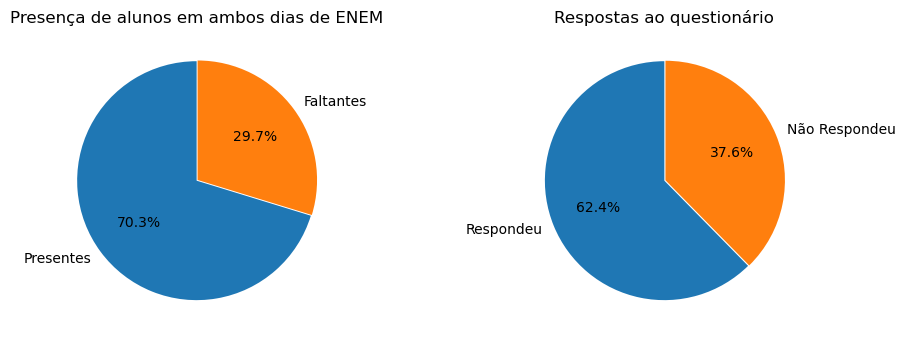

In [143]:
# Get lines where TP_PRESENCA_CH is 1 & TP_PRESENCA_CN is 1 & TP_PRESENCA_LC is 1 & TP_PRESENCA_MT is 1
data_presentes = df_microdados[(df_microdados['TP_PRESENCA_CH'] == 1) & (df_microdados['TP_PRESENCA_CN'] == 1) & (df_microdados['TP_PRESENCA_LC'] == 1) & (df_microdados['TP_PRESENCA_MT'] == 1)]
# Get lines where TP_PRESENCA_ch IS 0 OR TP_PRESENCA_CN IS 0 OR TP_PRESENCA_LC IS 0 OR TP_PRESENCA_MT IS 0
data_faltantes = df_microdados[(df_microdados['TP_PRESENCA_CH'] == 0) | (df_microdados['TP_PRESENCA_CN'] == 0) | (df_microdados['TP_PRESENCA_LC'] == 0) | (df_microdados['TP_PRESENCA_MT'] == 0)]

# Substitui 2 (depois responderia) e 0 (não respondeu) para "Não Respondeu" e 1 para "Respondeu" na coluna 'TP_RESPOSTA' em df_questionario 
replace_dict = {0: 'Não Respondeu', 1: 'Respondeu',2: 'Não Respondeu'}
df_questionario['TP_RESPOSTA'] = df_questionario['TP_RESPOSTA'].replace(replace_dict)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.5))
axes = axes.flatten()

axes[0].pie([data_presentes.shape[0], data_faltantes.shape[0]], explode=(0, 0.01), labels=['Presentes', 'Faltantes'], autopct='%1.1f%%', startangle=90)
axes[0].set_title('Presença de alunos em ambos dias de ENEM')
axes[1].pie(df_questionario['TP_RESPOSTA'].value_counts(), explode=(0, 0.01), labels=['Respondeu', 'Não Respondeu'], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Respostas ao questionário')
plt.tight_layout()

In [110]:
# Filtra linhas que os alunos responderam o questionário
qst_respondido = df_questionario[df_questionario['TP_RESPOSTA'] == 1]

### Avaliando métodos de estudo dos alunos durante a pandemia

### Avaliando dificuldades encontradas nos estudos durante a pandemia

### Grupos de Raça e Idade

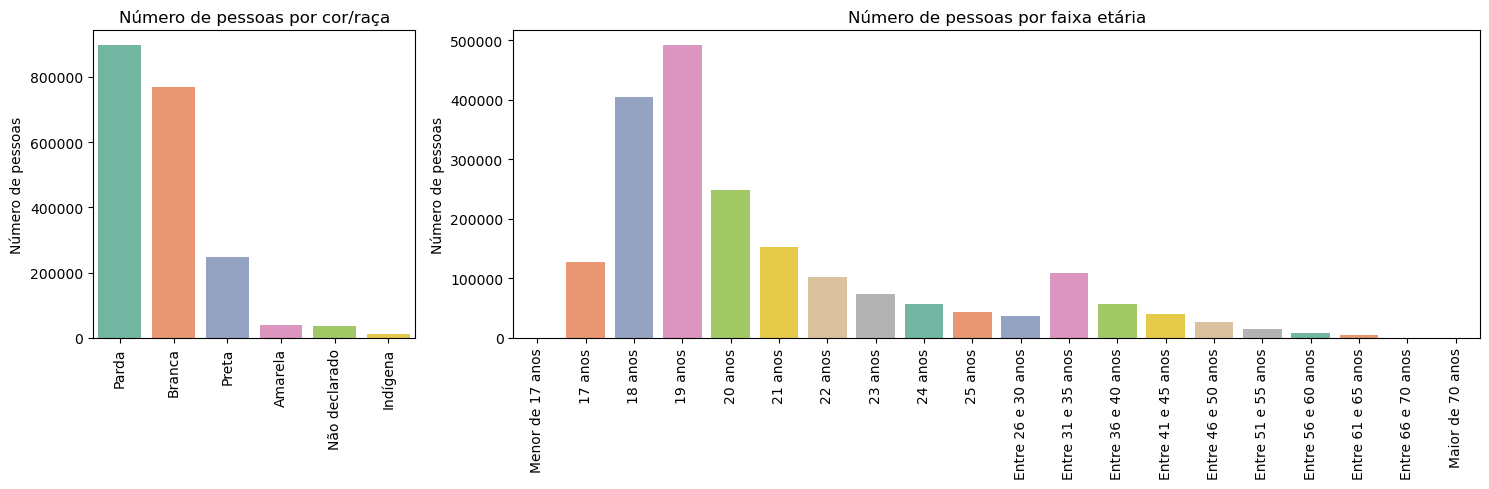

In [137]:
fig = plt.figure(figsize=(15, 5))
# Renomear valores
racas_dict = { 0: 'Não declarado', 1: 'Branca', 2: 'Preta',
            3: 'Parda', 4: 'Amarela', 5: 'Indígena', 6: 'Sem informação'}
idades_dict = {   
    0: 'Menor de 17 anos', 1: '17 anos', 2: '18 anos', 3: '19 anos', 4: '20 anos',
    5: '21 anos', 6: '22 anos', 7:'23 anos', 8:'24 anos', 9:'25 anos',
    10: 'Entre 26 e 30 anos', 11:'Entre 31 e 35 anos', 12:'Entre 36 e 40 anos',
    13: 'Entre 41 e 45 anos', 14: 'Entre 46 e 50 anos', 15: 'Entre 51 e 55 anos',
    16: 'Entre 56 e 60 anos', 17: 'Entre 61 e 65 anos', 19: 'Entre 66 e 70 anos', 
    20: 'Maior de 70 anos'  
}

for i in range(0,18):
    df_microdados.loc[df_microdados['TP_FAIXA_ETARIA'] == i, 'TP_FAIXA_ETARIA'] = idades_dict[i]
for i in range(0, 7):
    df_microdados.loc[df_microdados['TP_COR_RACA'] == i, 'TP_COR_RACA'] = racas_dict[i]

gs = gridspec.GridSpec(1, 2, width_ratios=[1, 3])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# Primeiro plot: Raça
sns.barplot(x=df_microdados['TP_COR_RACA'].value_counts().index, y=df_microdados['TP_COR_RACA'].value_counts(), ax=ax1, palette='Set2', width=0.8)
ax1.set_ylabel('Número de pessoas')
ax1.set_title('Número de pessoas por cor/raça')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_xlabel('')

# Segundo plot: Faixa Etária
sns.barplot(x=df_microdados['TP_FAIXA_ETARIA'].value_counts().index, y=df_microdados['TP_FAIXA_ETARIA'].value_counts(), ax=ax2, palette='Set2', order=idades_dict.values())
ax2.set_ylabel('Número de pessoas')
plt.xlabel('Faixa Etária')
ax2.set_title('Número de pessoas por faixa etária')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_xlabel('')

plt.tight_layout();
plt.show()

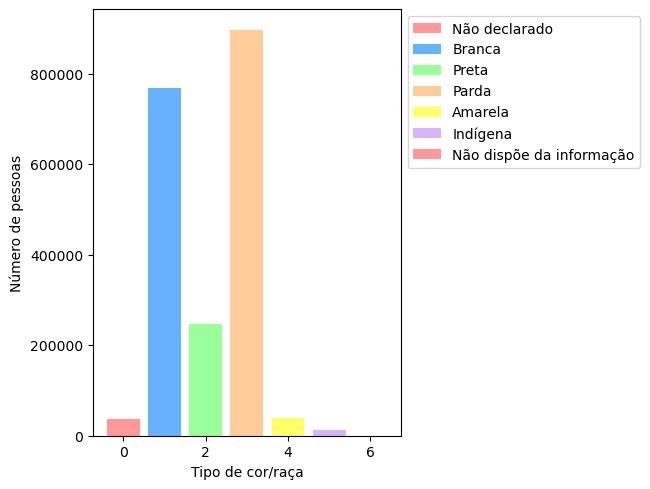

In [111]:
# Contando o número de pessoas para cada tipo de cor/raça
num_people = []
for i in range(0, 7):
    num_people.append(len(df_microdados[df_microdados['TP_COR_RACA'] == i]))



# Defining colors for each bar
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFFF66', '#D9B3FF', '#CCCCCC']

# Creating labels for the legend
labels = [
    'Não declarado',
    'Branca',
    'Preta',
    'Parda',
    'Amarela',
    'Indígena',
    'Não dispõe da informação'
]

# Creating the bar chart with different colors
bars = plt.bar(range(0, 7), num_people, color=colors[:-1])

# Adding a legend to the plot and positioning it outside of the plotting area
plt.legend(bars, labels, loc='upper left', bbox_to_anchor=(1, 1))

# Making room for the legend by adjusting the plot size
plt.tight_layout()

plt.xlabel('Tipo de cor/raça')
plt.ylabel('Número de pessoas')
plt.show()


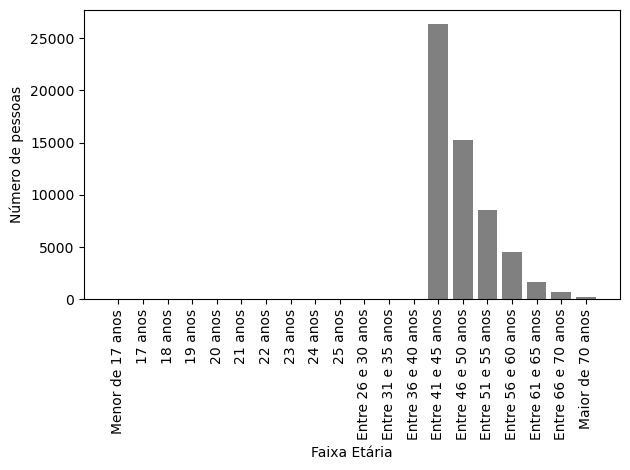

In [114]:
num_people = []
for i in range(1, 21):
    num_people.append(len(df_microdados[df_microdados['TP_FAIXA_ETARIA'] == i]))

# Labels for the age groups
labels = [
    'Menor de 17 anos', '17 anos', '18 anos', '19 anos', '20 anos',
    '21 anos', '22 anos', '23 anos', '24 anos', '25 anos',
    'Entre 26 e 30 anos', 'Entre 31 e 35 anos', 'Entre 36 e 40 anos',
    'Entre 41 e 45 anos', 'Entre 46 e 50 anos', 'Entre 51 e 55 anos',
    'Entre 56 e 60 anos', 'Entre 61 e 65 anos', 'Entre 66 e 70 anos', 
    'Maior de 70 anos'
]

# Create bar chart with grayscale colors
bars = plt.bar(range(1, 21), num_people, color='gray')

# Set xticks and xticklabels
plt.xticks(range(1, 21), labels, rotation=90)  # Rotate x-labels for better readability

plt.xlabel('Faixa Etária')
plt.ylabel('Número de pessoas')
plt.tight_layout()  # Adjust layout to make sure everything fits
plt.show()